In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
file_path = "data1/Spotify-2000.csv"

df = pd.read_csv(file_path)
print(df.head(5))

   Index                   Title             Artist            Top Genre  \
0      1                 Sunrise        Norah Jones      adult standards   
1      2             Black Night        Deep Purple           album rock   
2      3          Clint Eastwood           Gorillaz  alternative hip hop   
3      4           The Pretender       Foo Fighters    alternative metal   
4      5  Waitin' On A Sunny Day  Bruce Springsteen         classic rock   

   Year  Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  \
0  2004                     157      30            53            -14   
1  2000                     135      79            50            -11   
2  2001                     168      69            66             -9   
3  2007                     173      96            43             -4   
4  2002                     106      82            58             -5   

   Liveness  Valence Length (Duration)  Acousticness  Speechiness  Popularity  
0        11       68          

In [6]:
import pandas as pd

file_path = "data1/Spotify-2000.csv"

def clean_and_extract_data(file_path, output_path):
   
    try:
        data = pd.read_csv(file_path)
    except Exception as e:
        print(f"Erreur lors du chargement du fichier : {e}")
        return None

    print("Colonnes disponibles :")
    print(data.columns)

    column_mapping = {
        'Title': 'Titre de la chanson',
        'Artist': 'Nom de l\'artiste',
        'Top Genre': 'Genre musical',
        'Year': 'Année de sortie',
        'Popularity': 'Nombre d\'écoutes'
    }
    
    # Sélectionner uniquement les colonnes d'intérêt
    try:
        cleaned_data = data[list(column_mapping.keys())].rename(columns=column_mapping)
    except KeyError as e:
        print(f"Colonnes manquantes dans le fichier : {e}")
        return None

    # Supprimer les lignes contenant des valeurs manquantes
    cleaned_data = cleaned_data.dropna()

    # Sauvegarder les données nettoyées
    cleaned_data.to_csv(output_path, index=False)
    print(f"Données nettoyées et sauvegardées dans {output_path}")

    return cleaned_data

file_path = "data1/Spotify-2000.csv" 
output_path = "data1/cleaned_spotify_data.csv"

cleaned_data = clean_and_extract_data(file_path, output_path)

if cleaned_data is not None:
    print("Aperçu des données nettoyées :")
    print(cleaned_data.head())


Colonnes disponibles :
Index(['Index', 'Title', 'Artist', 'Top Genre', 'Year',
       'Beats Per Minute (BPM)', 'Energy', 'Danceability', 'Loudness (dB)',
       'Liveness', 'Valence', 'Length (Duration)', 'Acousticness',
       'Speechiness', 'Popularity'],
      dtype='object')
Données nettoyées et sauvegardées dans data1/cleaned_spotify_data.csv
Aperçu des données nettoyées :
      Titre de la chanson   Nom de l'artiste        Genre musical  \
0                 Sunrise        Norah Jones      adult standards   
1             Black Night        Deep Purple           album rock   
2          Clint Eastwood           Gorillaz  alternative hip hop   
3           The Pretender       Foo Fighters    alternative metal   
4  Waitin' On A Sunny Day  Bruce Springsteen         classic rock   

   Année de sortie  Nombre d'écoutes  
0             2004                71  
1             2000                39  
2             2001                69  
3             2007                76  
4       

In [9]:
file_path = "data1/cleaned_spotify_data.csv"
df = pd.read_csv(file_path)

try:
    aggregated_stats = df.select_dtypes(include=['number']).agg(['max', 'min', 'sum', 'mean'])
    print("\nStatistiques agrégées :")
    print(aggregated_stats)
except Exception as e:
    print(f"Erreur lors de l'agrégation : {e}")


Statistiques agrégées :
      Année de sortie  Nombre d'écoutes
max      2.019000e+03         100.00000
min      1.956000e+03          11.00000
sum      3.974028e+06      118696.00000
mean     1.992993e+03          59.52658


In [10]:
df = pd.read_csv('data1/cleaned_spotify_data.csv')
genre_counts = df['Genre musical'].value_counts()
print(genre_counts)

Genre musical
album rock                 413
adult standards            123
dutch pop                   88
alternative rock            86
dance pop                   83
                          ... 
german alternative rock      1
classic italian pop          1
pop punk                     1
motown                       1
bebop                        1
Name: count, Length: 149, dtype: int64


In [7]:
import pandas as pd

file_path = "data1/cleaned_spotify_data.csv"
data = pd.read_csv(file_path)

# Trier les chansons par nombre d'écoutes décroissant
top_100 = data.sort_values(by='Nombre d\'écoutes', ascending=False).head(100)

# Compter le nombre de chansons par genre
genre_counts = top_100['Genre musical'].value_counts()

# Identifier le genre le plus représenté
genre_dominant = genre_counts.idxmax()
nombre_chansons = genre_counts.max()

print(f"Le genre le plus représenté dans le Top 100 est : {genre_dominant} avec {nombre_chansons} chansons.")

# Afficher les genres et leur fréquence
print("\nDistribution des genres dans le Top 100 :")
print(genre_counts)


Le genre le plus représenté dans le Top 100 est : dance pop avec 15 chansons.

Distribution des genres dans le Top 100 :
Genre musical
dance pop              15
album rock             11
pop                    10
modern rock             8
alternative rock        7
permanent wave          4
neo mellow              3
alternative metal       3
glam metal              3
canadian pop            2
electropop              2
indie pop               2
boy band                2
detroit hip hop         2
art rock                2
irish rock              2
dance rock              2
australian pop          1
big room                1
baroque pop             1
australian psych        1
disco                   1
folk-pop                1
electro                 1
celtic punk             1
glam rock               1
acoustic pop            1
garage rock             1
british invasion        1
danish pop              1
g funk                  1
classic soul            1
electro house           1
ccm    

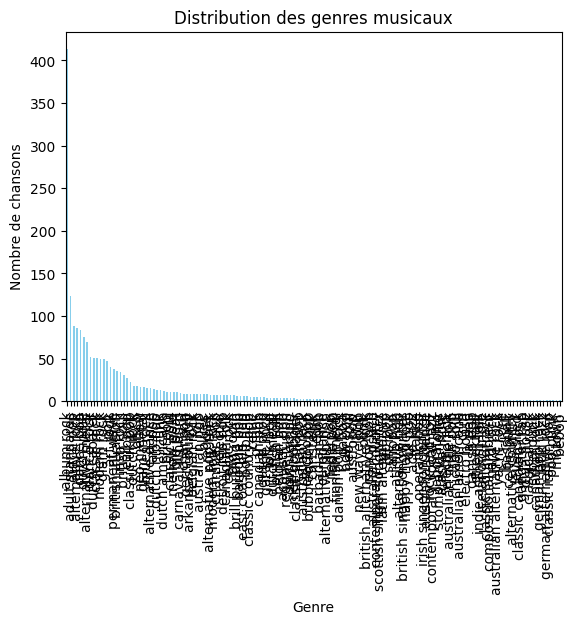

In [19]:
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution des genres musicaux')
plt.xlabel('Genre')
plt.ylabel('Nombre de chansons')
plt.show()

In [27]:
ecoute_annee = df.groupby("Année de sortie")["Nombre d'écoutes"].mean()
print("Nombre d'écoute par année:")
print(ecoute_annee)

Nombre d'écoute par année:
Année de sortie
1956    62.000000
1958    67.800000
1959    65.000000
1960    74.000000
1961    78.000000
          ...    
2015    53.500000
2016    57.342857
2017    62.800000
2018    49.865385
2019    63.952381
Name: Nombre d'écoutes, Length: 63, dtype: float64


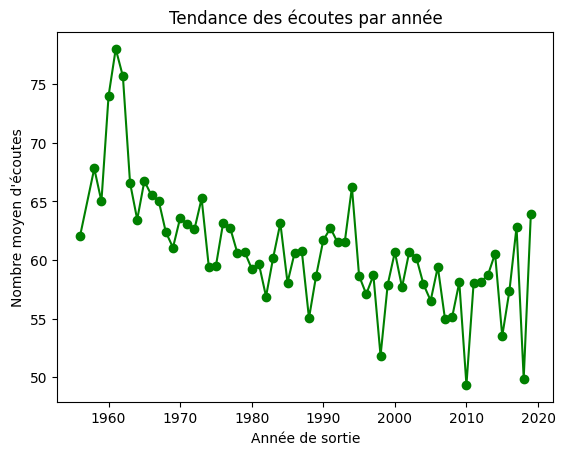

In [30]:
ecoute_annee.plot(kind='line', marker='o', color='green')
plt.title('Tendance des écoutes par année')
plt.xlabel('Année de sortie')
plt.ylabel('Nombre moyen d\'écoutes')
plt.show()

Année avec le plus grand nombre de chansons :
Année de sortie    2008.000000
total_chansons       54.000000
moyenne_ecoutes      55.111111
Name: 51, dtype: float64

Année avec la moyenne d'écoutes la plus élevée :
Année de sortie    1961.0
total_chansons        1.0
moyenne_ecoutes      78.0
Name: 4, dtype: float64


Text(0, 0.5, 'Nombre de chansons')

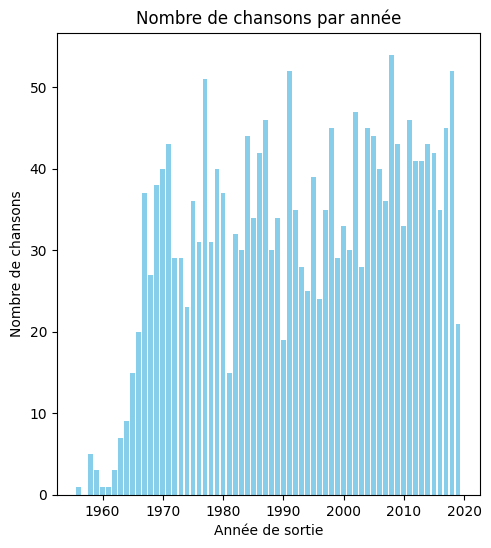

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "data1/cleaned_spotify_data.csv"
data = pd.read_csv(file_path)

# Calculer le nombre moyen d'écoutes par chanson pour chaque année
grouped_data = data.groupby('Année de sortie').agg(
    total_chansons=('Titre de la chanson', 'count'),
    moyenne_ecoutes=('Nombre d\'écoutes', 'mean')
).reset_index()

# Identifier les années marquantes
max_chansons = grouped_data['total_chansons'].idxmax()
max_ecoutes = grouped_data['moyenne_ecoutes'].idxmax()

print("Année avec le plus grand nombre de chansons :")
print(grouped_data.iloc[max_chansons])

print("\nAnnée avec la moyenne d'écoutes la plus élevée :")
print(grouped_data.iloc[max_ecoutes])

# Visualisation des tendances
plt.figure(figsize=(12, 6))

# Nombre de chansons par année
plt.subplot(1, 2, 1)
plt.bar(grouped_data['Année de sortie'], grouped_data['total_chansons'], color='skyblue')
plt.title('Nombre de chansons par année')
plt.xlabel('Année de sortie')
plt.ylabel('Nombre de chansons')


In [14]:
df = pd.read_csv('data1/cleaned_spotify_data.csv')

mean_plays = df["Nombre d'écoutes"].mean()
popular_songs = df[df["Nombre d'écoutes"] > mean_plays]
print(popular_songs)

     Titre de la chanson          Nom de l'artiste        Genre musical  \
0                Sunrise               Norah Jones      adult standards   
2         Clint Eastwood                  Gorillaz  alternative hip hop   
3          The Pretender              Foo Fighters    alternative metal   
6      She Will Be Loved                  Maroon 5                  pop   
7     Knights of Cydonia                      Muse          modern rock   
...                  ...                       ...                  ...   
1988          Summertime           Louis Armstrong      adult standards   
1989    Heartbreak Hotel             Elvis Presley      adult standards   
1990           Hound Dog             Elvis Presley      adult standards   
1991     Johnny B. Goode               Chuck Berry           blues rock   
1992           Take Five  The Dave Brubeck Quartet                bebop   

      Année de sortie  Nombre d'écoutes  
0                2004                71  
2              

In [40]:
df = pd.read_csv('data1/cleaned_spotify_data.csv')

df.sort_values(by=["Nombre d'écoutes"], ascending=False)

Titre de la chanson        Nom de l'artiste   Genre musical  \
793                      Dance Monkey             Tones and I  australian pop   
787                          Memories                Maroon 5             pop   
1641  All I Want for Christmas Is You            Mariah Carey       dance pop   
786                           bad guy           Billie Eilish      electropop   
688                          Believer         Imagine Dragons     modern rock   
...                               ...                     ...             ...   
605                   Het Dorp - Live           Wim Sonneveld   dutch cabaret   
411                  Peter Gunn Theme  Emerson, Lake & Palmer      album rock   
624               Three Days In A Row                   Anouk     dutch indie   
773                  Hou Vol Hou Vast                    BLØF       dutch pop   
1793                        Sacrifice                   Anouk     dutch indie   

      Année de sortie  Nombre d'écoutes  
793              2019               100  
787              2019                98  
1641             1994                95  
786              2019                95  
688              2017                88  
...               ...               ...  
605              2015                15  
411              2010                14  
624              2015                13  
773              2018                12  
1793             1998                11  

[1994 rows x 5 columns]

In [41]:
top_songs = popular_songs.sort_values("Nombre d'écoutes", ascending=False).head(10)
print(top_songs[["Titre de la chanson", "Nom de l'artiste"]])

                  Titre de la chanson     Nom de l'artiste
793                      Dance Monkey          Tones and I
787                          Memories             Maroon 5
786                           bad guy        Billie Eilish
1641  All I Want for Christmas Is You         Mariah Carey
726                           Shallow            Lady Gaga
688                          Believer      Imagine Dragons
745                        High Hopes  Panic! At The Disco
683                           Perfect           Ed Sheeran
687                      Shape of You           Ed Sheeran
774          One Kiss (with Dua Lipa)        Calvin Harris
